In [70]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

df = pd.read_csv('file.csv')


Saving file.csv to file (3).csv


In [71]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


заменим строки на числа, чтобы нейросеть смогла с ними работать

In [72]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [73]:
df = df.drop("employee_id", axis=1)
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mean())
df['education'] = df['education'].fillna(df['education'].mode()[0])
df.isna().sum()


department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder
reg = LabelEncoder()
reg.fit(df['region'])
df['region'] = reg.transform(df['region'])
dep = LabelEncoder()
dep.fit(df['department'])
df['department'] = dep.transform(df['department'])
gen = LabelEncoder()
gen.fit(df['gender'])
df['gender'] = gen.transform(df['gender'])
rc = LabelEncoder()
rc.fit(df['recruitment_channel'])
df['recruitment_channel'] = rc.transform(df['recruitment_channel'])
edu = LabelEncoder()
edu.fit(df['education'])
df['education'] = edu.transform(df['education'])
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0


пропуски есть только в previous_year_rating, заполним средним значением по столбцу

идем дальше, пропусков больше нет

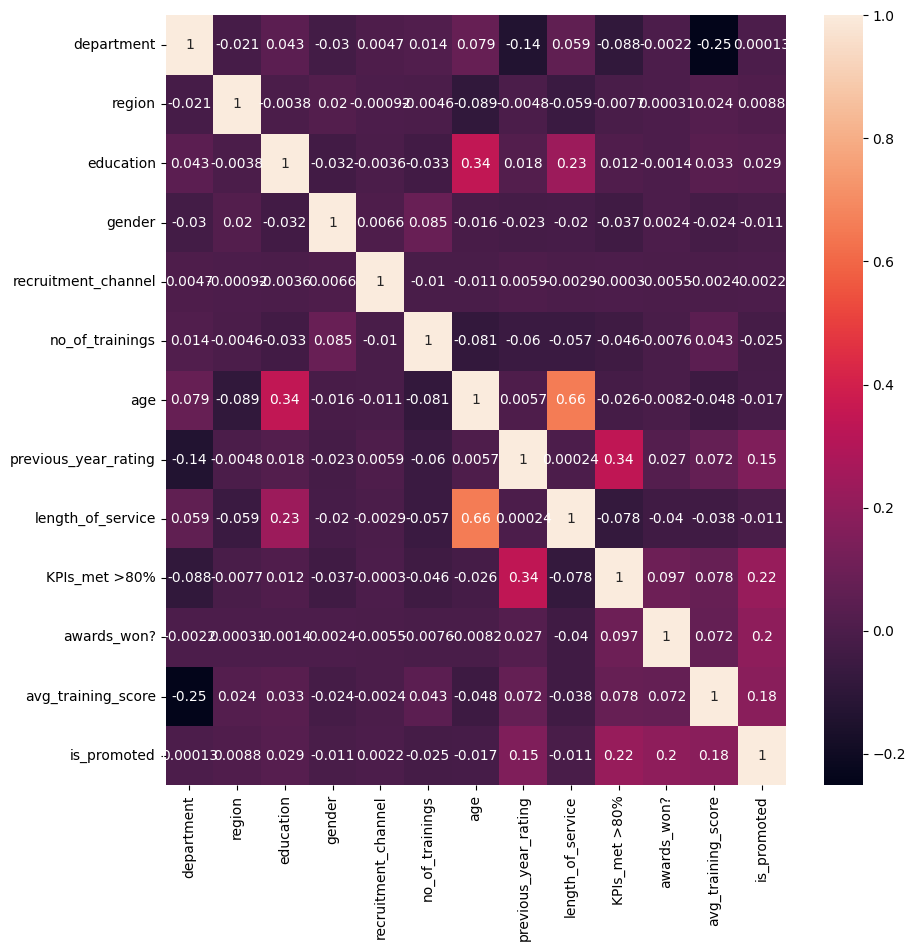

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [76]:
df = df[['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']]
df.head()

,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,5.0,1,0,49,0
1,5.0,0,0,60,0
2,3.0,0,0,50,0
3,1.0,0,0,50,0
4,3.0,0,0,73,0


In [77]:
for i in df:
  print(df[i].value_counts())

previous_year_rating
3.000000    18618
5.000000    11741
4.000000     9877
1.000000     6223
2.000000     4225
3.329256     4124
Name: count, dtype: int64
KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64
awards_won?
0    53538
1     1270
Name: count, dtype: int64
avg_training_score
50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: count, Length: 61, dtype: int64
is_promoted
0    50140
1     4668
Name: count, dtype: int64


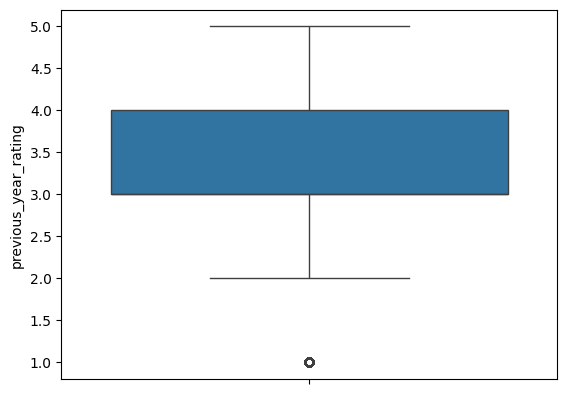

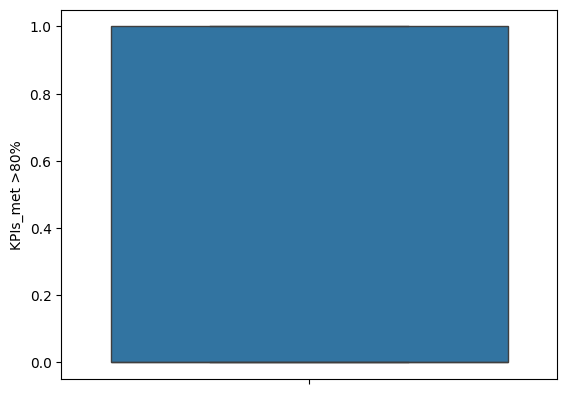

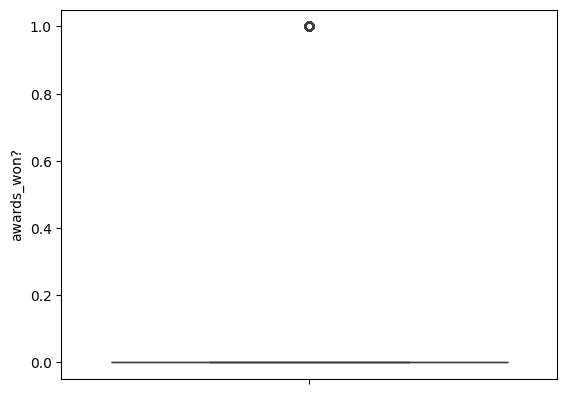

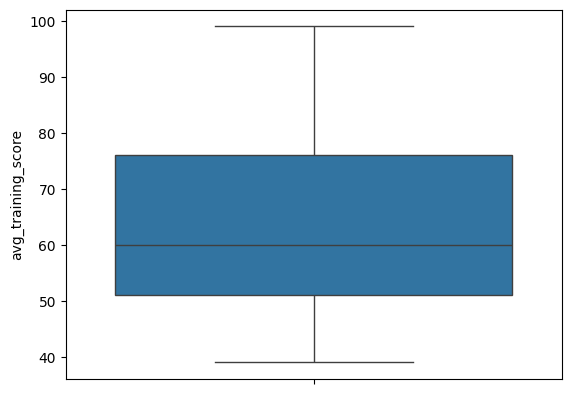

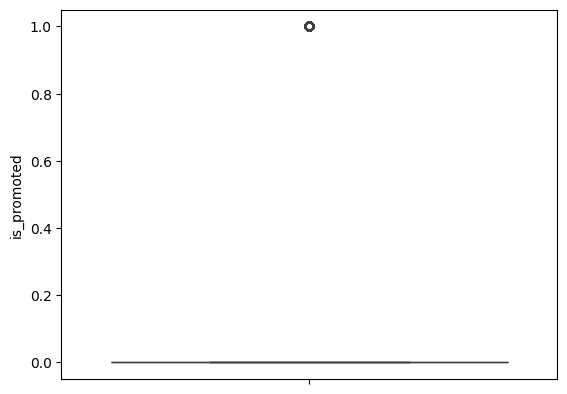

In [78]:
for i in df:
  plt.figure()
  sns.boxplot(data=df[i])
  plt.show()

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x = df.drop(['is_promoted'], axis=1)
y = df['is_promoted']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [80]:
model.coef_

array([[0.32080937, 1.26829482, 1.92408787, 0.04293324]])

неприятные коэффиценты в уравнении

In [81]:
prediction = model.predict(x_test)
print(accuracy_score(y_test, prediction))

0.916256157635468


Вероятность предсказания 0.91 - оч крутой результат

In [82]:


from sklearn.metrics import confusion_matrix

conf_matr = confusion_matrix(y_test, prediction)
print(conf_matr)



[[9985   48]
 [ 870   59]]


In [83]:
tn, fp, fn, tp = conf_matr.ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 9985
FP: 48
FN: 870
TP: 59


In [84]:
accuracy = (tp+tn)/(tp+tn+fn+fp)
print(accuracy)

0.916256157635468


In [85]:
recall = tp/(tp+fn)
print(recall)

0.06350914962325081


In [86]:
pres = tp/(tp+fp)
print(pres)

0.5514018691588785
